In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

In [2]:
model = YOLO(model='/home/kalyan/gitrepo/alma-mater/Sem4/ROS/src/my_py_pkg/my_py_pkg/best.pt')

In [49]:
load_img = cv2.imread('/home/kalyan/gitrepo/alma-mater/Sem4/ROS/Desktop/cam_feed.jpg')

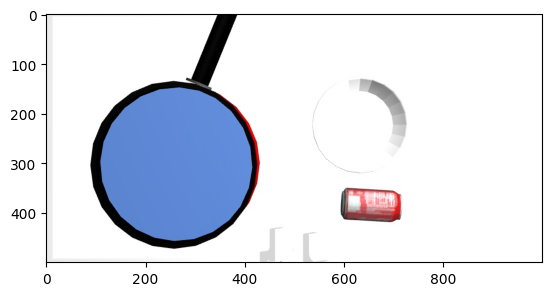

In [50]:
plt.imshow(load_img)

In [51]:
results = model(load_img)


0: 320x640 1 Fish-dish, 1 Tea-cup, 6.7ms
Speed: 19.0ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [52]:
boxes = results[0].cpu().boxes
results[0].names

{0: 'Chopsticks-cover',
 1: 'Chopsticks-one',
 2: 'Chopsticks-two',
 3: 'Coffee',
 4: 'Coffee-cup',
 5: 'Coffee-dish',
 6: 'Cup',
 7: 'Fish-dish',
 8: 'Paper',
 9: 'Rice-bowl',
 10: 'Soup-bowl',
 11: 'Spoon',
 12: 'Square-bowl',
 13: 'Tea-cup',
 14: 'Tea-dish',
 15: 'Towel',
 16: 'Towel-dish',
 17: 'Waster-paper',
 18: 'Water-cup',
 19: 'Wine-cup'}

Im here
Im here


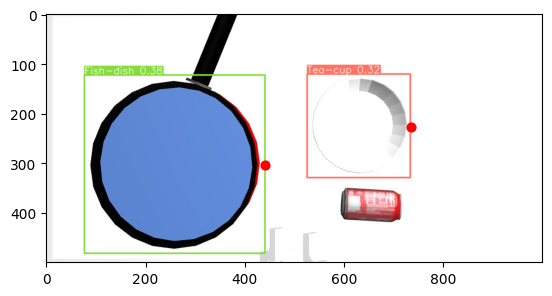

In [53]:
res_plotted = results[0].plot()
            
x = []
y = []
for box in boxes:
    box = box.xyxy
    if (box[0][2] - box[0][0]) > 70:
        y.append((box[0][1] + box[0][3]) / 2)
        print("Im here")
        x.append((box[0][2]))
    else:
        x.append((box[0][0] + box[0][2]) / 2)
        y.append((box[0][1] + box[0][3]) / 2)
plt.scatter(x, y, c='r', s=40)
plt.imshow(res_plotted)

In [54]:
objects = {}
iter = 0
for i in boxes.cls.numpy():
    if i not in objects.keys():
        objects[results[0].names[i]] = []
        objects[results[0].names[i]].append((x[iter], y[iter]))
    else:
        objects[results[0].names[i]].append((x[iter].numpy(), y[iter].numpy()))
    iter += 1
print(objects)

{'Fish-dish': [(tensor(441.0561), tensor(303.1271))], 'Tea-cup': [(tensor(734.5454), tensor(226.6745))]}


In [72]:
objects

{'Fish-dish': [(tensor(441.0561), tensor(303.1271))],
 'Tea-cup': [(tensor(734.5454), tensor(226.6745))]}

In [70]:
box[0][2] - box[0][0]


AttributeError: 'Tensor' object has no attribute 'xyxy'

In [ ]:
import os
from ament_index_python.packages import get_package_share_directory
from launch import LaunchDescription
from launch_ros.actions import Node
from launch.substitutions import LaunchConfiguration
from launch.actions import ExecuteProcess, IncludeLaunchDescription, RegisterEventHandler, DeclareLaunchArgument, TimerAction
from launch.conditions import IfCondition, UnlessCondition
from launch.event_handlers import OnProcessExit
from launch.launch_description_sources import PythonLaunchDescriptionSource
import xacro
import yaml

# LOAD FILE:
def load_file(package_name, file_path):
    package_path = get_package_share_directory(package_name)
    absolute_file_path = os.path.join(package_path, file_path)
    try:
        with open(absolute_file_path, 'r') as file:
            return file.read()
    except EnvironmentError:
        # parent of IOError, OSError *and* WindowsError where available.
        return None
# LOAD YAML:
def load_yaml(package_name, file_path):
    package_path = get_package_share_directory(package_name)
    absolute_file_path = os.path.join(package_path, file_path)
    try:
        with open(absolute_file_path, 'r') as file:
            return yaml.safe_load(file)
    except EnvironmentError:
        # parent of IOError, OSError *and* WindowsError where available.
        return None

# ========== **GENERATE LAUNCH DESCRIPTION** ========== #
def generate_launch_description():


    # *********************** Gazebo *********************** # 
    
    # DECLARE Gazebo WORLD file:
    irb120_ros2_gazebo = os.path.join(
        get_package_share_directory('irb120_ros2_gazebo'),
        'worlds',
        'irb120.world')
    # DECLARE Gazebo LAUNCH file:
    gazebo = IncludeLaunchDescription(
                PythonLaunchDescriptionSource([os.path.join(
                    get_package_share_directory('gazebo_ros'), 'launch'), '/gazebo.launch.py']),
                launch_arguments={'world': irb120_ros2_gazebo}.items(),
             )

    # ***** COMMAND LINE ARGUMENTS ***** #
    print("")
    print(" --- Cranfield University --- ")
    print("        (c) IFRA Group        ")
    print("")

    print("ros2_RobotSimulation --> ABB IRB-120")
    print("Launch file -> irb120_interface.launch.py")

    print("")
    print("Robot configuration:")
    print("")

    # Cell Layout:
    print("- Cell layout:")
    error = True
    while (error == True):
        print("     + Option N1: ABB IRB-120 alone.")
        print("     + Option N2: ABB IRB-120 in Cranfield University cell.")
        print("     + Option N3: ABB IRB-120 Pick&Place Use-Case.")
        cell_layout = input ("  Please select: ")
        if (cell_layout == "1"):
            error = False
            cell_layout_1 = "true"
            cell_layout_2 = "false"
            cell_layout_3 = "false"
        elif (cell_layout == "2"):
            error = False
            cell_layout_1 = "false"
            cell_layout_2 = "true"
            cell_layout_3 = "false"
        elif (cell_layout == "3"):
            error = False
            cell_layout_1 = "false"
            cell_layout_2 = "false"
            cell_layout_3 = "true"
        else:
            print ("  Please select a valid option!")
    print("")

    # End-Effector:
    print("- End-effector:")
    error = True
    while (error == True):
        print("     + Option N1: No end-effector.")
        print("     + Option N2: Schunk EGP-64 parallel gripper.")
        end_effector = input ("  Please select: ")
        if (end_effector == "1"):
            error = False
            EE_no = "true"
            EE_schunk = "false"
        elif (end_effector == "2"):
            error = False
            EE_no = "false"
            EE_schunk = "true"
        else:
            print ("  Please select a valid option!")
    print("")

    # ***** ROBOT DESCRIPTION ***** #
    # ABB-IRB120 Description file package:
    irb120_description_path = os.path.join(
        get_package_share_directory('irb120_ros2_gazebo'))
    # ABB-IRB120 ROBOT urdf file path:
    xacro_file = os.path.join(irb120_description_path,
                              'urdf',
                              'irb120.urdf.xacro')
    # Generate ROBOT_DESCRIPTION for ABB-IRB120:
    doc = xacro.parse(open(xacro_file))
    xacro.process_doc(doc, mappings={
        "cell_layout_1": cell_layout_1,
        "cell_layout_2": cell_layout_2,
        "cell_layout_3": cell_layout_3,
        "EE_no": EE_no,
        "EE_schunk": EE_schunk,
        })
    robot_description_config = doc.toxml()
    robot_description = {'robot_description': robot_description_config}
    #write robot_description to .urdf file
    with open('irb120.urdf', 'w') as file:
        file.write(robot_description_config)